In [23]:
import re
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
from rich.table import Table
from rich.console import Console

df = pd.read_csv("labeled_customer_data.csv")

──────────────────────────────────────────── Demographic Visualization ────────────────────────────────────────────

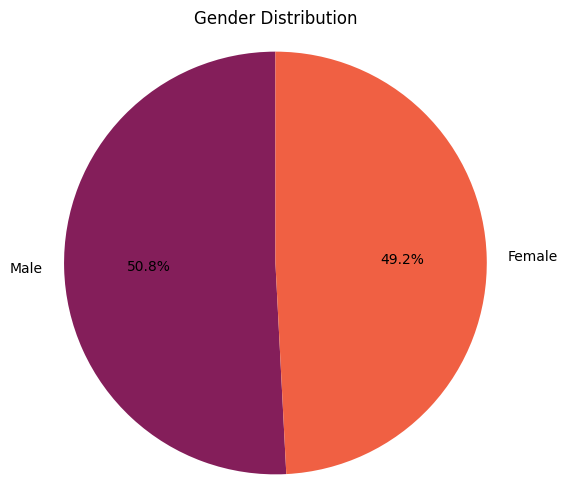

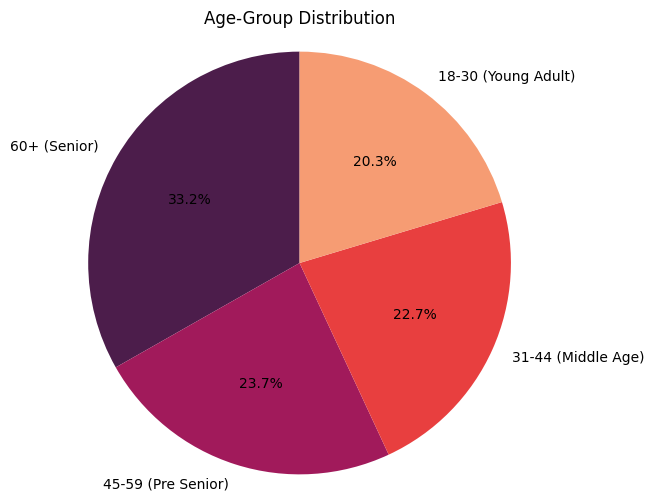

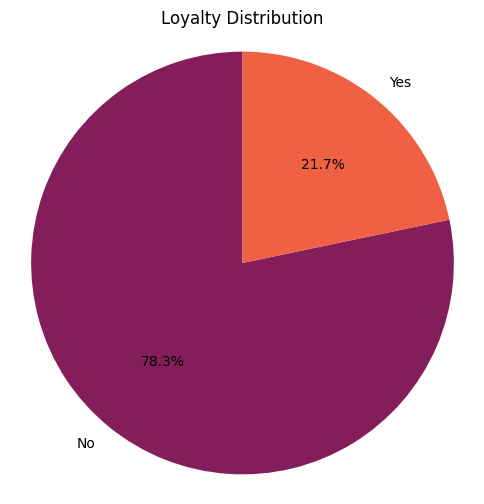

In [ ]:
# Demographic Visualization
Console().rule("[bold yellow]Demographic Visualization")
# 1. Gender - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("rocket", len(gender_counts)),
)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

# 2. Age Group - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

age_counts = df["Age_Group"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("rocket", len(age_counts)),
)
plt.title("Age-Group Distribution")
plt.axis("equal")
plt.show()

# 3. Loyalty Member - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

loyalty_counts = df["Loyalty Member"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    loyalty_counts,
    labels=loyalty_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("rocket", len(loyalty_counts)),
)
plt.title("Loyalty Distribution")
plt.axis("equal")
plt.show()

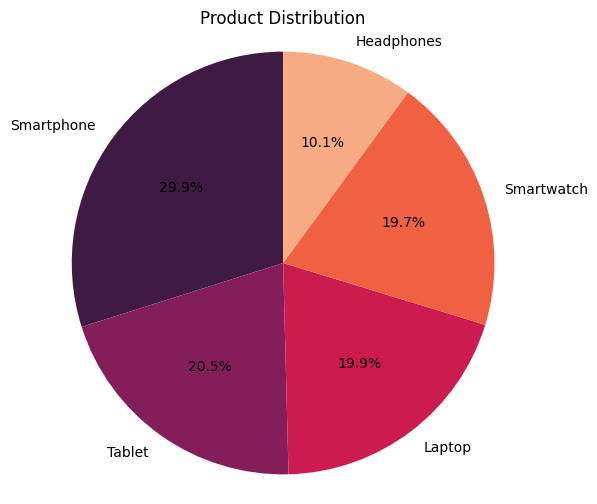

In [25]:
# Sales Behaviour Visualization
# 2. Product - Pie Chart
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

product_counts = df["Product Type"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    product_counts,
    labels=product_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("rocket", len(product_counts)),
)
plt.title("Product Distribution")
plt.axis("equal")
plt.show()

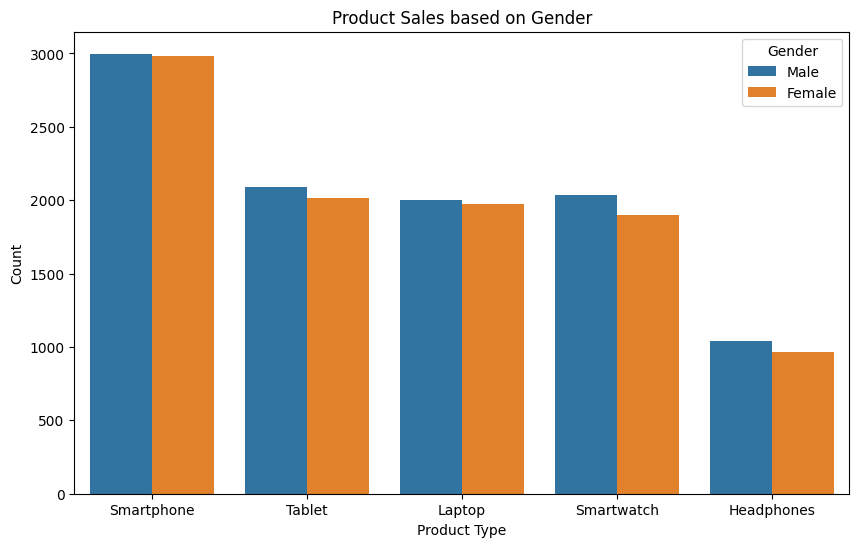

In [26]:
# 3. Product Sales based on Gender - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Product Type", hue="Gender")
plt.title("Product Sales based on Gender")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

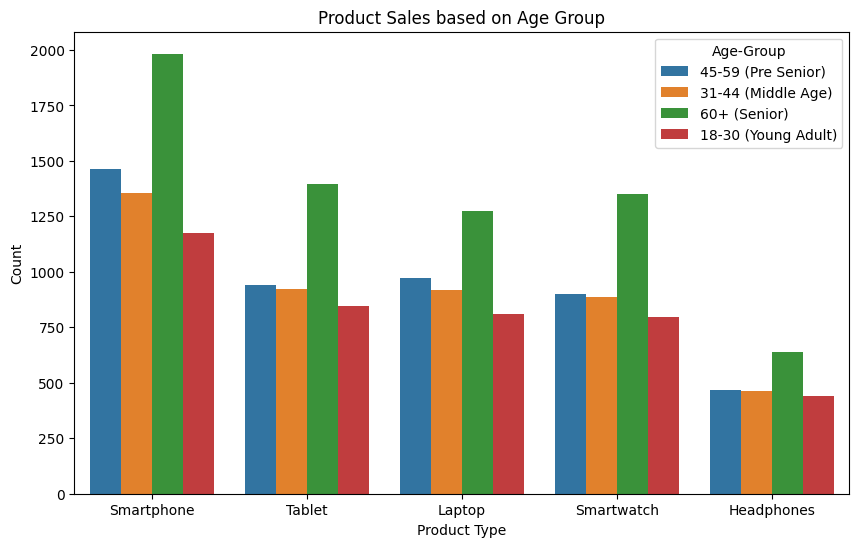

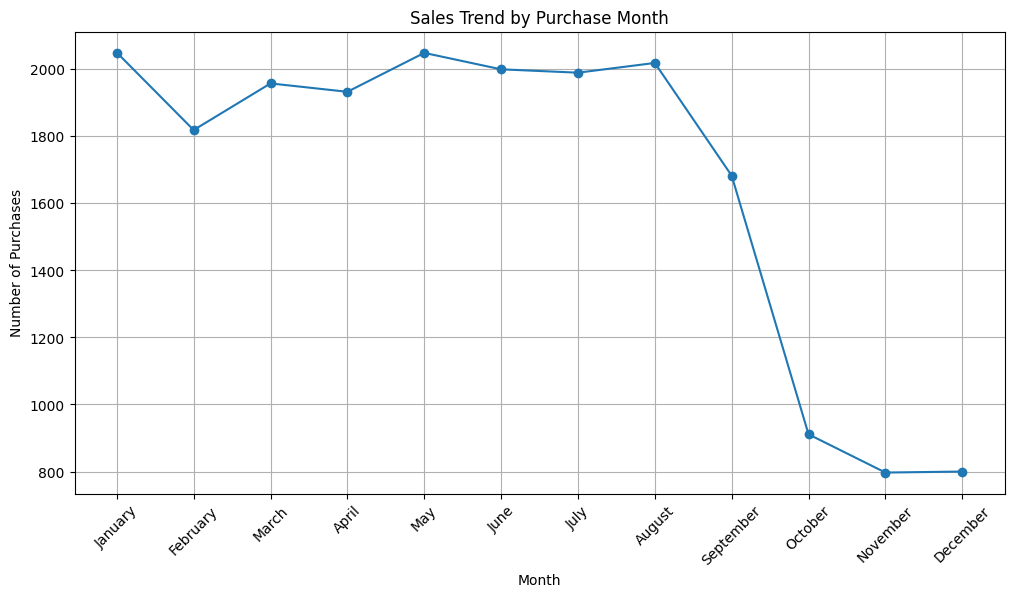

In [28]:
# 4. Product Sales based on Quantity - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Product Type", hue="Age_Group")
plt.title("Product Sales based on Age Group")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.legend(title="Age-Group")
plt.show()

# 5. line chart Sales Trend by Purchase Month
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Purchase Month"] = df["Purchase Date"].dt.month_name()
monthly_sales = (
    df.groupby("Purchase Month")
    .size()
    .reindex(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )
    .fillna(0)
)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Sales Trend by Purchase Month")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.grid()
plt.show()